# **Libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn  as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix,classification_report

c:\Users\Asus\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = pd.read_csv('data/market_cluster.csv', encoding='latin1')


In [3]:
dataset.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin,Cluster
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,0.32,Medium
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,0.20,Medium
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,0.07,Low
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,0.10,Low
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,0.39,High


In [4]:
dataset = pd.DataFrame(dataset)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
 11  profit_margin  9994 non-null   float64
 12  Cluster        9994 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


# **Split Data and Encoder**

In [6]:
encoder = LabelEncoder()
# X = dataset.drop(['Order ID','Cluster','Discount','Sales','profit_margin','Profit','Sub Category','State'],axis=1)
X = dataset.drop(['Cluster','Profit','Sub Category','State','Order Date'],axis=1)

y = dataset['Profit']

In [7]:
columns_used = X.columns

In [8]:
for col in columns_used :
    X[col] = encoder.fit_transform(X[col])

for col in columns_used:
    X[col] = X[col].round(2)

X.head()


,Order ID,Customer Name,Category,City,Region,Sales,Discount,profit_margin
0,0,12,5,21,2,748,2,47
1,1111,37,1,8,3,246,8,28
2,2222,14,3,13,4,1849,11,4
3,3333,15,4,4,3,393,15,9
4,4444,28,3,12,3,1845,16,60


In [9]:
y = encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<AxesSubplot:>

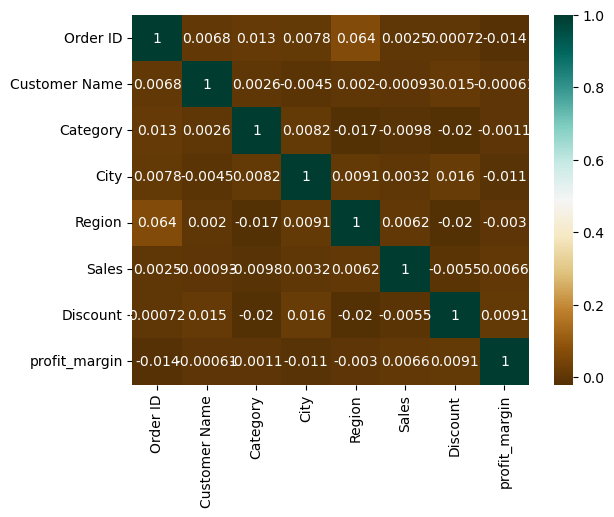

In [10]:
heatcol = X.corr()
sns.heatmap(heatcol,cmap="BrBG",annot=True)

<AxesSubplot:>

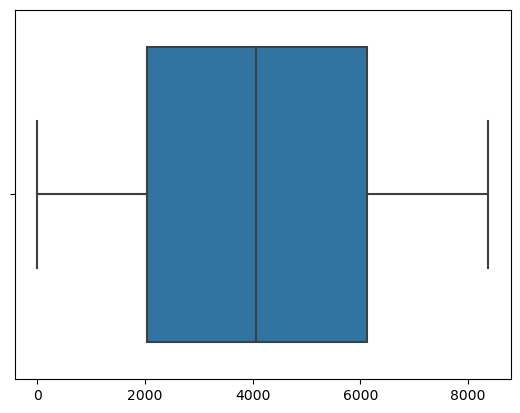

In [11]:
sns.boxplot(x=y)

<AxesSubplot:ylabel='Count'>

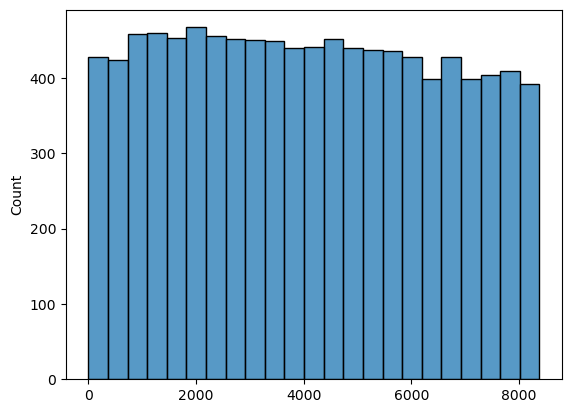

In [12]:
sns.histplot(y)

In [13]:
# Dimension of Train and Test set
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Dimension of Train set (7995, 8)
Dimension of Test set (1999, 8) 

Number of numeric features: 8


# **SVM**

In [14]:
svm_model = SVR(epsilon=0.001, C=70)
svm_model.fit(X_train, y_train)

Y_pred = svm_model.predict(X_test)

In [16]:
import joblib
joblib.dump(svm_model, 'model/svmr_model.pkl')

['model/svmr_model.pkl']

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate MAE and MSE
mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 1668.5838949662207
Mean Squared Error: 3910547.842800155


In [18]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, Y_pred)
print("accuracy : ", r_squared)

accuracy :  0.33007015102039605


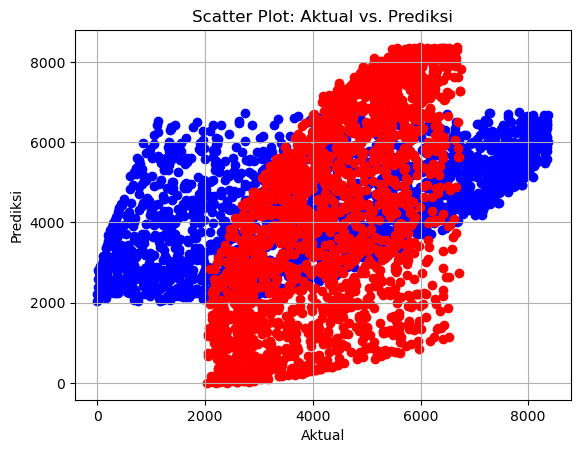

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_test, Y_pred, c='blue', label='Actual', marker='o')
plt.scatter(Y_pred, y_test, c='red', label='Predicted', marker='o')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Scatter Plot: Aktual vs. Prediksi")
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.grid(True)
plt.show()


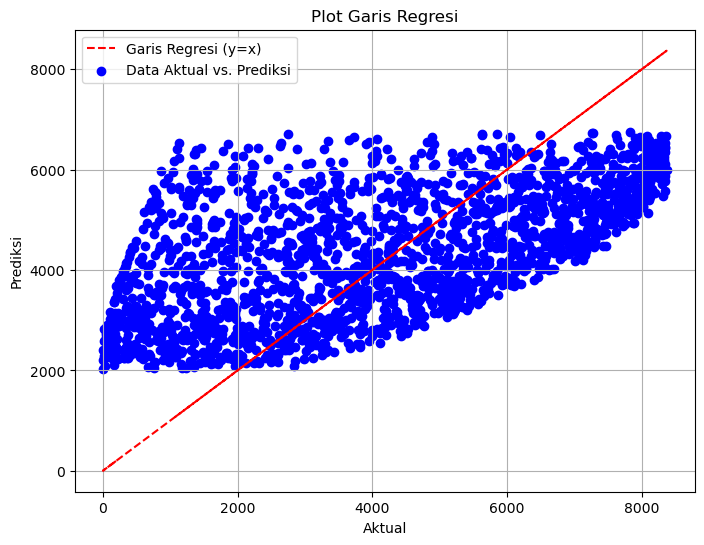

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, y_test, 'r--', label="Garis Regresi (y=x)")
plt.scatter(y_test, Y_pred, c='blue', label="Data Aktual vs. Prediksi")
plt.title("Plot Garis Regresi")
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.legend()
plt.grid(True)
plt.show()